[Reference](https://medium.com/aimonks/understanding-types-of-data-drift-in-machine-learning-93cd2afee63e)

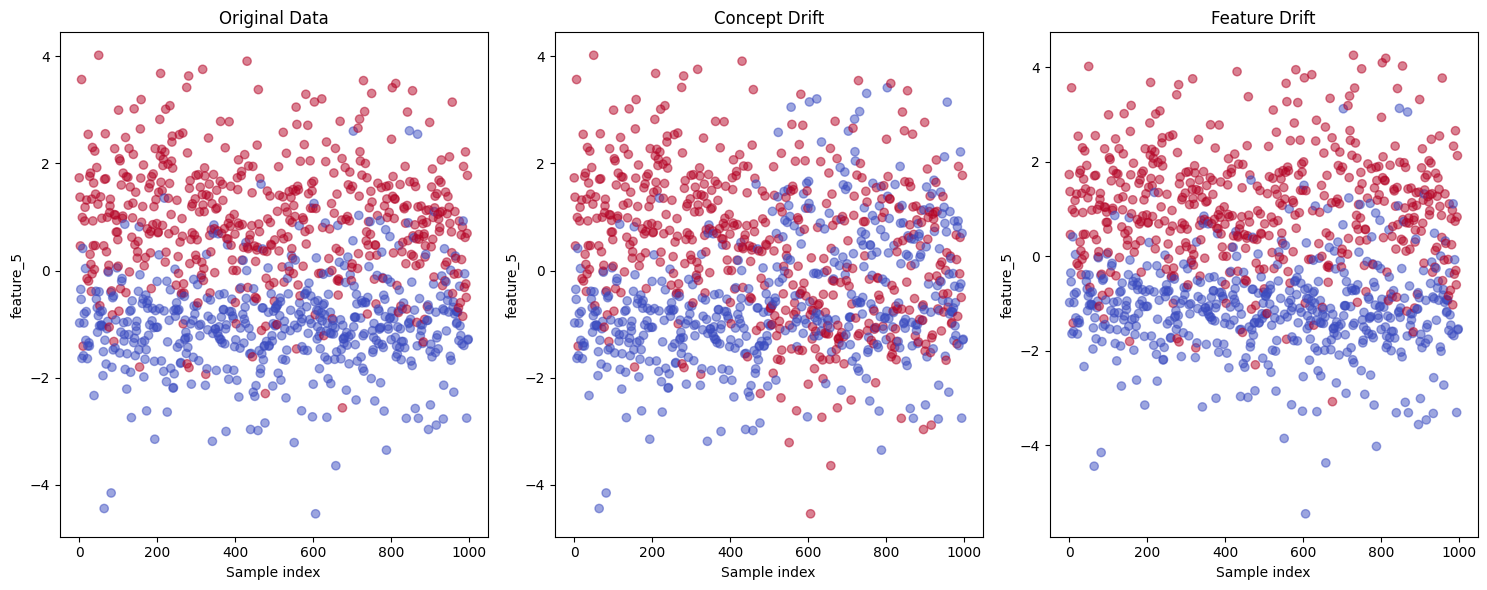

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generating a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Creating a DataFrame
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df['target'] = y

# Function to introduce concept drift
def introduce_concept_drift(df, drift_point, drift_magnitude):
    df.loc[drift_point:, "target"] = df.loc[drift_point:, "target"].apply(lambda x: 1 - x if np.random.rand() < drift_magnitude else x)
    return df

# Function to introduce feature drift
def introduce_feature_drift(df, drift_point, drift_feature, drift_magnitude):
    df.loc[drift_point:, drift_feature] *= (1 + drift_magnitude)
    return df

# Introducing concept drift
df_concept_drift = introduce_concept_drift(df.copy(), drift_point=500, drift_magnitude=0.5)

# Introducing feature drift
feature_to_drift = "feature_5"
df_feature_drift = introduce_feature_drift(df.copy(), drift_point=500, drift_feature=feature_to_drift, drift_magnitude=0.2)

# Plotting
plt.figure(figsize=(15, 6))

# Original data
plt.subplot(1, 3, 1)
plt.scatter(df.index, df[feature_to_drift], c=df['target'], cmap='coolwarm', alpha=0.5)
plt.title("Original Data")
plt.xlabel("Sample index")
plt.ylabel(feature_to_drift)

# Concept drift
plt.subplot(1, 3, 2)
plt.scatter(df_concept_drift.index, df_concept_drift[feature_to_drift], c=df_concept_drift['target'], cmap='coolwarm', alpha=0.5)
plt.title("Concept Drift")
plt.xlabel("Sample index")
plt.ylabel(feature_to_drift)

# Feature drift
plt.subplot(1, 3, 3)
plt.scatter(df_feature_drift.index, df_feature_drift[feature_to_drift], c=df_feature_drift['target'], cmap='coolwarm', alpha=0.5)
plt.title("Feature Drift")
plt.xlabel("Sample index")
plt.ylabel(feature_to_drift)

plt.tight_layout()
plt.show()